In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [20]:
dataset = pd.read_csv('/content/riceClassification.csv', delimiter=',')

In [21]:
dataset.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [24]:
dataset['Class'].replace(1, "Jasmine", inplace=True)
dataset['Class'].replace(0, "Gonen", inplace=True)

<ipython-input-24-10a6daa4d134>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Class'].replace(1, "Jasmine", inplace=True)


In [25]:
vals = dataset["Class"].unique()
vals

array(['Jasmine', 'Gonen'], dtype=object)

In [28]:
cols_for_clusters = ['Area', 'MajorAxisLength','MinorAxisLength']
# Area - площадь, MajorAxisLength - длина  MinorAxisLength - ширина
df = dataset[cols_for_clusters].copy()

In [29]:
df.head()

,Area,MajorAxisLength,MinorAxisLength
0,4537,92.229316,64.012769
1,2872,74.691881,51.400454
2,3048,76.293164,52.043491
3,3073,77.033628,51.928487
4,3693,85.124785,56.374021


In [31]:
X = df
y = dataset["Class"].replace(vals, [0, 1])
yvals = dataset["Class"]

<ipython-input-31-1b908bf47d48>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["Class"].replace(vals, [0, 1])


In [32]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

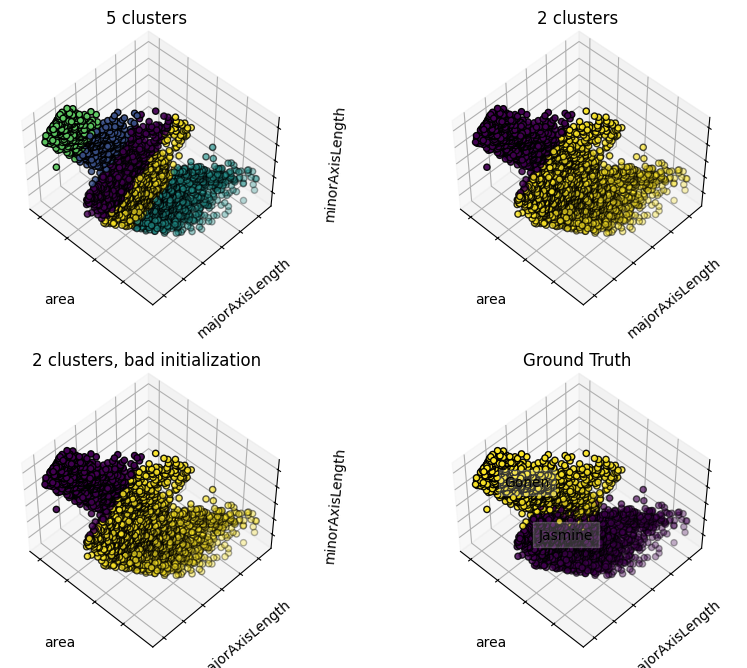

In [34]:
estimators = [
    ("k_means_rice_5", KMeans(n_clusters=5)),
    ("k_means_rice_2", KMeans(n_clusters=2)),
    ("k_means_rice_bad_init", KMeans(n_clusters=2, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["5 clusters", "2 clusters", "2 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Area"], X["MajorAxisLength"], X["MinorAxisLength"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("area")
    ax.set_ylabel("majorAxisLength")
    ax.set_zlabel("minorAxisLength")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["Class"]==name]
    ax.text3D(
        ds["Area"].mean(),
        ds["MajorAxisLength"].mean(),
        ds["MinorAxisLength"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Area"], X["MajorAxisLength"], X["MinorAxisLength"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("area")
ax.set_ylabel("majorAxisLength")
ax.set_zlabel("minorAxisLength")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [35]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [36]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [37]:
best_metric

[2,
 0.6829151122338065,
 0.6989055860852503,
 array([[8706.56927399,  157.29612489,   71.33621737],
        [6047.63587813,  148.35587609,   52.98187141]])]

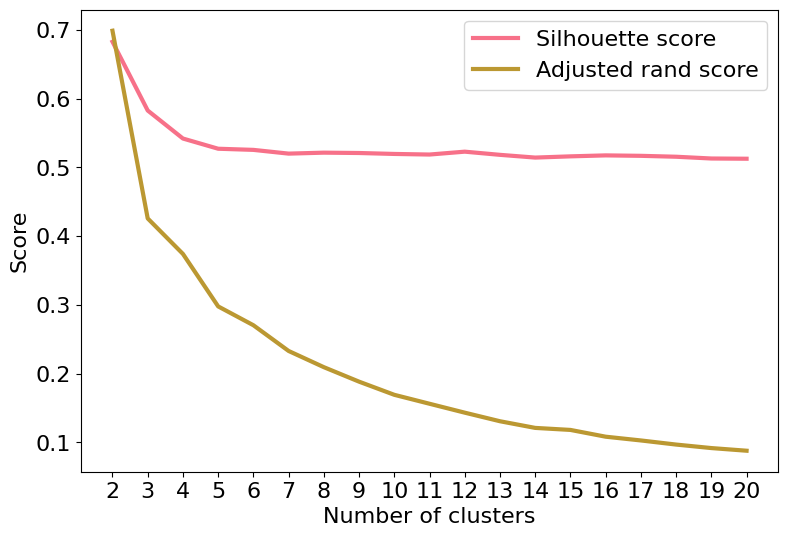

In [38]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram

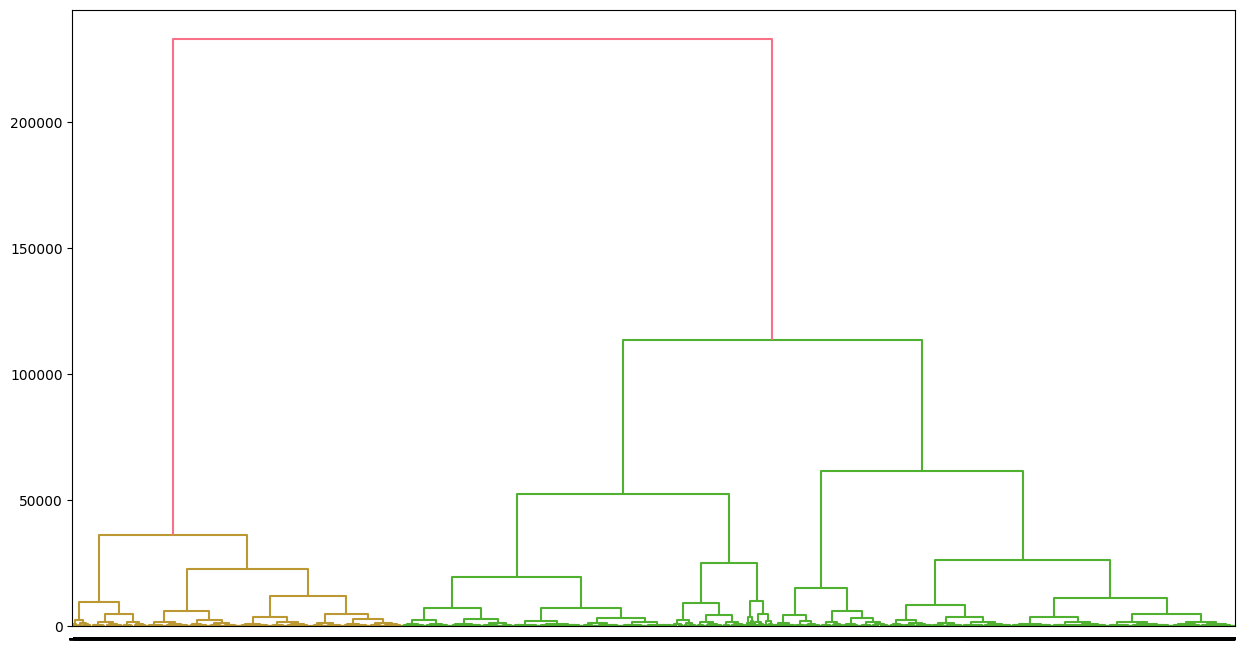

In [40]:
samples = df.values


mergings = linkage(samples, method='ward')


plt.figure(figsize=(15, 8))

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [42]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [43]:
mins = X.shape[1]

['y', 'b', 'g']


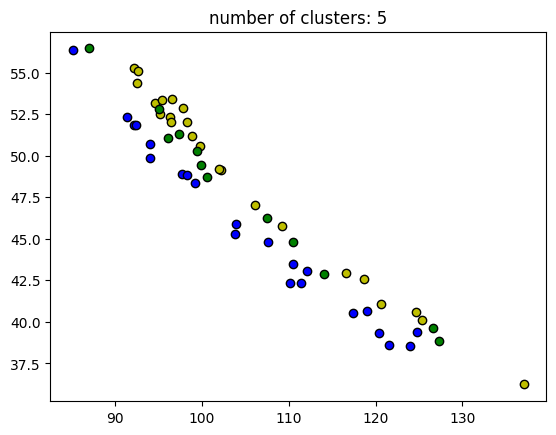

In [108]:
db = DBSCAN(eps=25, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["MajorAxisLength"], xy["MinorAxisLength"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["MajorAxisLength"], xy["MinorAxisLength"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

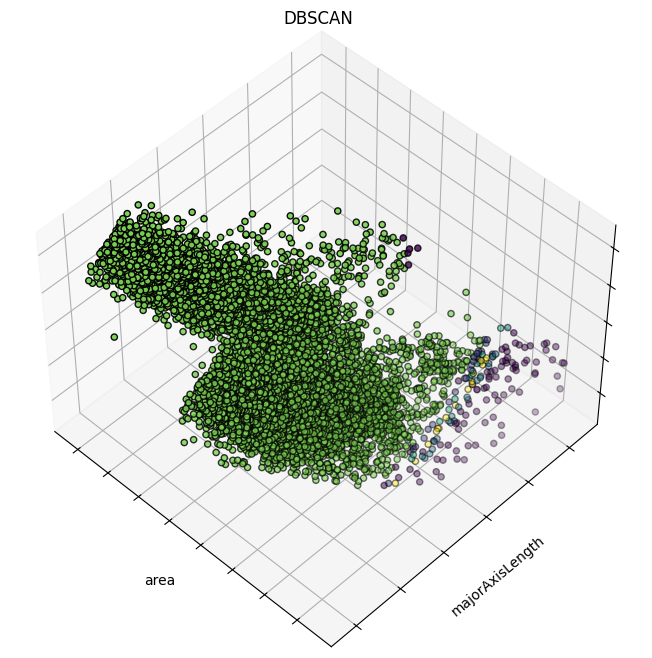

In [109]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Area"], X["MajorAxisLength"], X["MinorAxisLength"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("area")
ax.set_ylabel("majorAxisLength")
ax.set_zlabel("minorAxisLength")
ax.set_title("DBSCAN")

plt.show()

In [110]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.40
Adjusted Rand Index: -0.00
